### Hello World

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam,  RMSprop
from keras import backend as K


In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, count = np.unique(y_train, return_counts=True)
print("Train lables : ", dict(zip(unique, count)))

unique, count = np.unique(y_test, return_counts=True)
print("\nTest labels : ", dict(zip(unique, count)))


Train lables :  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels :  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


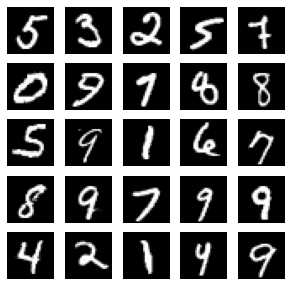

In [9]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-sample.png")
plt.close('all')

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [12]:
num_labels = len(np.unique(y_train))


In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
image_size =  x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [15]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32')/255

In [16]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [17]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=(input_size)))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [23]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
!pip install graphviz 

You should consider upgrading via the 'c:\users\91892\ccdp\scripts\python.exe -m pip install --upgrade pip' command.


In [24]:
model.compile(loss='categorical_crossentropy', 
             optimizer = 'adam',
             metrics = 'accuracy')

In [25]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 6ms/step - loss: 0.4277 - accuracy: 0.8677
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1945 - accuracy: 0.9420
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1514 - accuracy: 0.9542
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1293 - accuracy: 0.9610
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1153 - accuracy: 0.9653
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1011 - accuracy: 0.9691
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0950 - accuracy: 0.9712
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0867 - accuracy: 0.9726
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0780 - accuracy: 0.9758
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0767 - accuracy: 0.9757

In [27]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9811

Test accuracy: 98.1%


In [32]:
from keras.regularizers import l2
model.add(Dense(hidden_units, 
               kernel_regularizer=l2(0.001),
               input_dim=input_size))

In [35]:
input_size

784

In [36]:
import os
os.pwd()

AttributeError: module 'os' has no attribute 'pwd'

In [38]:
%pwd

'C:\\Users\\91892\\DataScience\\DeepLearning\\Keras\\ComputerVision'